<img src="./img/HWNI_logo.svg"/>

# Lab 06 - Linear Algebra - Solutions

In [1]:
# makes our plots interactive
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab06utils as utils 

# Visualizing Linear Transformations

Below, you'll find a tool for visualizing linear transformations in two dimensions. In this lab, we'll step through various kinds of linear transformations and try to develop an intuition for what they do.

First, we'll define some transformation matrices. Once you've made it through the lab, you're encouraged to make your own matrices (a fun example: make random matrices using functions in `np.random` and see what they do) and to play around with the visualizer. As another example, here's a challenge: make a function that takes in a vector and return a matrix that, when multiplied by a new vector, computes the dot product of that new vector with the first one.

In [2]:
eye = [[1,0],
       [0,1]]

scaling1 = [[3,0],
            [0,3]]

scaling2 = [[1/2,0],
            [0,1/2]]

shear = [[1,2],
         [0,0.5]]

simple_reflection = [[0,1],
                     [1,0]]

negative_reflection = [[0,-1],
                       [-1,0]]


rank0 = [[0,0],
         [0,0]]

rank1 = [[1,2],
         [1,2]]

rot90 = utils.makeRotation(theta=np.pi/2)

rot180 = utils.makeRotation(theta=np.pi) #uncomment, your code here

def makeInnerProductMatrix(vector):
    return [vector,[0,0]]

innerp = makeInnerProductMatrix([1,0.5])

You'll learn more about why each transformation has its particular name later on.

The animation below will work by plotting a mesh, or grid, of points and then applying the transformation to them.

The two meshes defined below are particularly useful, but you can define your own if you'd like. Type `utils.setupPlot?` to learn how.

In [3]:
unitSquareMesh = {'delta':0.1,
                    'xMin' :0,
                    'xMax' : 1,
                    'yMin' : 0,
                    'yMax' : 1,}

allQuadrantsMesh = {'delta':0.1,
                    'xMin' :-0.5,
                    'xMax' : 0.5,
                    'yMin' : -0.5,
                    'yMax' : 0.5,}

To generate an animation, you need to pick a `mesh` and a `transform` in the cell below, then run the cell beneath it.

Run these two cells as they are and check out the output.

If the animation runs too fast, increase the value of the `delay` argument below. If it runs too slow, decrease the value of `delay` (minimum `0`). You can learn more about `animateTransformation` by typing `utils.animateTransformation?`.

In [22]:
transform = scaling2
#transform = np.dot(R,np.diag([2,2]))
transform = rank0
#transform = T

#transform = np.dot(scaling1,rot90)
#transform = np.random.randn(2,2)

#transform = rot180
#transform = negative_reflection

#transform = innerp

mesh = unitSquareMesh

<IPython.core.display.Javascript object>


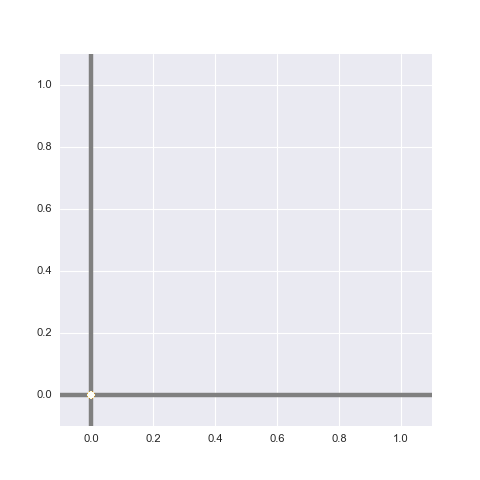

In [23]:
scatter,figure,axes = utils.setupPlot(transform,
                                meshProperties=mesh,
                                plotColumns=True,
                                plotEigenvectors=True)

utils.animateTransformation(transform,scatter,figure,
                                meshProperties=mesh,
                                 delay=0.05)

Below, we'll work through each class of matrices and learn a bit about them. You'll want to visualize each transformation with both the `unitSquare` grid and the `fourQuadrant` grid. If you think you've got the hang of one class, try making a new matrix of the same type (`yourMatrix = [[a,b],[c,d]]`) and check to see if you're right.

### `scaling` 

A scaling matrix just changes the lengths of vectors, a by the same amount.

#### Q1 How can we tell a matrix is a scaling matrix just by looking at its entries? 

<font color="1874CD"> **It has zeros off the diagonal and the same number in each diagonal position. **

The basis vectors determine the bottom and left sides of a square with area 1. We call this the "unit" square. After the basis vectors are transformed, they still map out a four-sided figure -- often a rectangle or a parallelogram.

#### Q2 What four-sided shape do the basis vectors define when they're transformed by a scaling matrix?

<font color="1874CD"> ** It's still a square! **

Determinants tell us the ratio of the area of this parallelogram to the area of the unit square. Use the `unitSquareMesh` to visualize this parallelogram directly for a scaling matrix. 

#### Q Using only this geometric information, what's the determinant of a scaling matrix?

<font color="1874CD"> **It's the scaling factor squared.**

There's a very special "scaling" matrix above, there called `eye`.

#### Q What's so special about `eye`?

<font color="1874CD"> ** It maps each vector to itself! **

In class, we discussed of way of viewing matrices: their columns tell you where your basis vectors go. 

#### Q Explain why `eye` is special from this point of view.

<font color="1874CD"> ** We can see that each basis vector is mapped to itself. **

### `rank1` and `rank0`

These matrices are called "non-invertible" -- there is no way to "undo" the transformation they perform.

#### Q Based on the animation, can you explain why? 

<font color="1874CD"> ** They squish multiple points to the same value -- that's not something you can undo.**

Calculate the determinant of a low-rank matrix (`np.linalg.det`). What do you get? 

#### Q Give an explanation for this number in terms of the "area of parallelograms" interpretation of the determinant.

<font color="1874CD"> ** You get 0. The unit square gets mapped to a line or a point, and the area of a line or a point is 0.**

### `rot`ations

The function `utils.makeRotation` will make a matrix that rotates the input by an angle `theta`. This works in radians, not degrees, so if you want to make a 90 degree rotation, you should input $\frac{\pi}{2}$. In Python, $\pi$ is called `np.pi`. Make a 180 degree rotation matrix, `rot180`. You'll use it in the next question.

### `reflection`s

We call some transformations "reflections" because they act like mirrors -- they transform points on one side of some axis (aka line) to their mirror images on the other side. 

#### Q What are the axes around which the `negative_reflection` and `simple_reflection` reflect points?

<font color="1874CD"> ** `simple` reflects around the `y=x` axis, while `negative` reflects around the `y=-x` axis.**

The `rot180` and `negative_reflection` matrices both send the `unitSquareMesh` to the bottom-left quadrant. These two transformations aren't the same though. 

#### Q How are the transformations `rot180` and `negative_reflection` different?

<font color="1874CD"> ** The `reflection` changes the orientation of the basis vectors: basis vector 1 ends up clockwise of basis vector 2, when it began counter-clockwise.**

### Combining Matrices

We can combine two transformations into one using matrix multiplication, implemented in Python with `np.dot`, the same function that lets us compute the dot products of vectors. The mathematical term for combining two things this way is "composition". Combine a scaling and rotation matrix together and observe the output.

Fun fact: you can think of multiplying *complex numbers*, or numbers that can have both real and imaginary parts, as multiplying a vector whose components are the real and imaginary parts of one number by a 2x2 matrix that is a composition of rotation and scaling. The rotation angle $\theta$ and scaling value $r$ for creating this matrix come from the polar representation of the complex number: $r\mathrm{e}^{i\theta}$. This is all you need to show that $e^{i\pi} +1 = 0$!

### Eigenvectors and Eigenvalues

All matrices have special vectors on which they act like a scaling plus rotation matrix -- they rotate these vectors by some amount and then scale them by some value. Because linear algebra ideas were originally formalized in German, these vectors have a German name: *eigenvectors*. *Eigen-* means "own" or "personal", as in "a man after my own heart". Because these vectors are so closely associated with the matrix, they are its "personal" vectors.

In addition to thinking about these special vectors, we also want to think about how these vectors are rotated and scaled -- if we know the special vectors and we know how they're rotated and scaled, then we can figure out whatever we need to know about this transformation.

In statistics, we mostly care about transformations that don't rotate their eigenvectors (more technically: their eigenvalues are *real* rather than *imaginary* or *complex*). Change the argument `plotEigenvectors` in `setupPlot` above to `True` and then look at all of the transformations above. When this argument is `True`, the eigenvectors of the transformation will be plotted, so long as they are the kind that only get scaled.

#### Q Which transformations have these kinds of eigenvectors?

<font color="1874CD"> ** The lower-rank matrices, the scalings, the shear, and the reflections. **

We can calculate the eigenvalues and eigenvectors using `np.linalg.eig`.

Check the eigenvalues of all of the transformations you listed in repsonse to the last question.

In [6]:
for transform in [scaling1,scaling2,shear,rank0,rank1,simple_reflection,negative_reflection]:
    print(transform)
    eigenvalues,eigenvectors = np.linalg.eig(transform) #your code here
    print(eigenvalues)
    print(eigenvectors)
    print('=*='*10)

[[3, 0], [0, 3]]
[ 3.  3.]
[[ 1.  0.]
 [ 0.  1.]]
=*==*==*==*==*==*==*==*==*==*=
[[0.5, 0], [0, 0.5]]
[ 0.5  0.5]
[[ 1.  0.]
 [ 0.  1.]]
=*==*==*==*==*==*==*==*==*==*=
[[1, 2], [0, 0.5]]
[ 1.   0.5]
[[ 1.         -0.9701425 ]
 [ 0.          0.24253563]]
=*==*==*==*==*==*==*==*==*==*=
[[0, 0], [0, 0]]
[ 0.  0.]
[[ 1.  0.]
 [ 0.  1.]]
=*==*==*==*==*==*==*==*==*==*=
[[1, 2], [1, 2]]
[ 0.  3.]
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
=*==*==*==*==*==*==*==*==*==*=
[[0, 1], [1, 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
=*==*==*==*==*==*==*==*==*==*=
[[0, -1], [-1, 0]]
[ 1. -1.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
=*==*==*==*==*==*==*==*==*==*=


In Python, a complex or imaginary number looks like `a+bj`, as in: `0.057+1.345j`.

#### Q Are the eigenvalues all, in fact, real numbers?


<font color="1874CD"> ** They sure are! **

Check the eigenvalues of the `rank1` and `rank0` matrices.

#### Q Do you notice anything special about them? Can you explain it? Hint: the determinant is the product of the eigenvalues.

<font color="1874CD"> ** They have at least 1 zero eigenvalue. This means that the determinant is 0, which makes sense because these transformations map the unit square to a line segment or a point, which has area 0.**